# Regression 
- Regression describes how one variable depend on another.
- In regression terminology, the variable being predicted is called the dependent variable Y (result/explained)
- The variable or variables being used to predict the value of the Y are called 
the independent variables X (regressor).
- Y is being “e$x$plained” or “modeled.”
The (mean) regression model can be written as
$\begin{equation}
Y = f(X) + \epsilon
\end{equation}
$
- where Y is explained by X, while X can be multidimensional. 
- The target of analysis is the systematic dependence of Y from X. 
- The regression function $f$ describes the dependence of the mean of Y as a function of X.
- The value $\epsilon$ can be treated as an individual deviation (error). 
- $\epsilon$ is usually assumed to be random with zero mean. 


# Scatterplot
- The fastest way to see a relationship between two variables is graphically with a scatterplot.
- In a Scatterplot we can also see if there is a distortion by outliers in the dataset.  
- A Scatterplot can be summerized by the avergaes of the x and y values, as well as their <br>
standard devaitions $s_x, s_y$
- Observations appear as a cloud of dots, if the dots spread out and don't give the idea of a <br>
general relationship the Correlation Coefficient will tell us about the clustering of dots around a line.


# Correlation
- Correlation can be used to measure the linear relationship between two variables. 
- The correlation coefﬁcient is a measure of linear association, or clustering around a line.
- Correlation Coefficients $r$ give us a hint of the realtionship: positiv or negative, strong or weak
- $r \approx  1$ means tight clustering around a line. $r \approx 0$ means loose clustering.
- With $r$ we have now five measure to describe the linear realationship: $\overline x, \overline y, s_x, s_y, r $
- Correlations are always between − 1 and 1.
- A positive correlation means that the cloud slopes up; as one variable increases, so does the other. 
- A negative correlation means that the cloud slopes down.
- A word of warning: $r = 0.80$ does not mean that 80% of the points are tightly <br>
clustered around a line, nor does it indicate twice as much linearity as $r = 0.40$.



In [2]:
import pandas as pd
from matplotlib import pyplot as plt;

In [37]:
plt.rcParams.update(plt.rcParamsefault) # reset rcParams

In [3]:
df = pd.read_csv("data/followers_and_likes.csv")
df.head()

,user_id,name,screen_name,followers_count,fav_avg,rt_avg
0,5558312.0,Senator John Boozman,JohnBoozman,44936,9.7,5.9
1,7270292.0,Jim Inhofe,JimInhofe,29761,11.6,28.2
2,7429102.0,Mark Warner,MarkWarner,130502,64.5,64.0
3,10615232.0,ChuckGrassley,ChuckGrassley,125662,36.5,25.0
4,11651202.0,Steve Daines,SteveDaines,14037,12.0,57.4


# First Inspection
- .describe() gives overview statistics of the dataset
- we could see that the mean of followers is far away from its max
- but pictures are more impressive and better to grasp

In [30]:
df.describe()

,user_id,followers_count,fav_avg,rt_avg
count,5.450000e+02,5.480000e+02,545.000000,545.000000
mean,7.131135e+16,1.634339e+05,174.455596,190.473945
std,2.297616e+17,1.597357e+06,1987.987926,795.892981
min,5.558312e+06,4.000000e+00,0.000000,0.300000
25%,5.686409e+07,8.960250e+03,4.200000,11.900000
50%,2.467691e+08,1.673200e+04,8.200000,33.900000
75%,1.206227e+09,3.308100e+04,21.500000,118.500000
max,8.547151e+17,3.171258e+07,42549.700000,12616.600000


In [53]:
df.dtypes

user_id            float64
name                object
screen_name         object
followers_count      int64
fav_avg            float64
rt_avg             float64
dtype: object

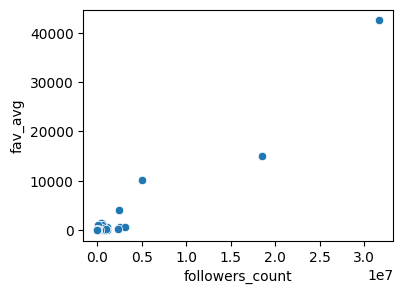

In [43]:
# our first scatter plot is distored because of the extreme outliers
import seaborn as sns

fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.scatterplot(x=df.followers_count,y= df.fav_avg)

## Boxplot
- A Boxplot helps to only get the most important oberservations witout the outliers.
- showfliers=False, suppresses the plotting of outliers.
- without outliers we see a clearer picture of where the bulk of followers lie.

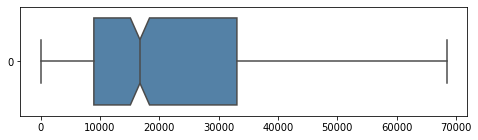

In [27]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 2))
ax = sns.boxplot(data=df.followers_count, orient="h", notch=True, color="steelblue", showfliers=False)

## Trim away the outliers
- Outliers can be defined by the Inter Quartile Range (IQR) and the upper and lower Quartiles (Q3, Q1).
- Quartiles cut the data in four parts, 25% of the data lie under the point of Q1 and 75% of the data lies below Q3.
- The IQR is the distance Q3-Q1, also called the mid-spread, 50% of the observations in the dataset fall into the IQR.
- Q2 is the median, and cuts the dataset in half. 
- IQR and Quartiles are used to build an Boxplot.
- An outlier can be defined as an observation over 1.5*IQR and under Q1 or over Q3. 
- Another method to detect outliers is by z-scores.

In [4]:
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

df1 = df.dropna()
Q1, Q3, IQR = outliers(df1.followers_count)
df_no = df1[~((df1.followers_count < (Q1 - 1.5 * IQR)) | (df1.followers_count > (Q3 + 1.5 * IQR)))]

In [5]:
df_no.head()
df_no.columns

Index(['user_id', 'name', 'screen_name', 'followers_count', 'fav_avg',
       'rt_avg'],
      dtype='object')

## Pairplot
- sns.pairplot() depicts the relationships between more than two variables in a dataset
- reduce your dataframe to the NUMERICAL variables you want you inspect only and pass it to sns.pairplot()
- `corner` let's you show only the lower corner of the plot,
- `diag_kind` gives you option for diagrams on the diagonal
- `height` (in inches) of each facet to change the figure size

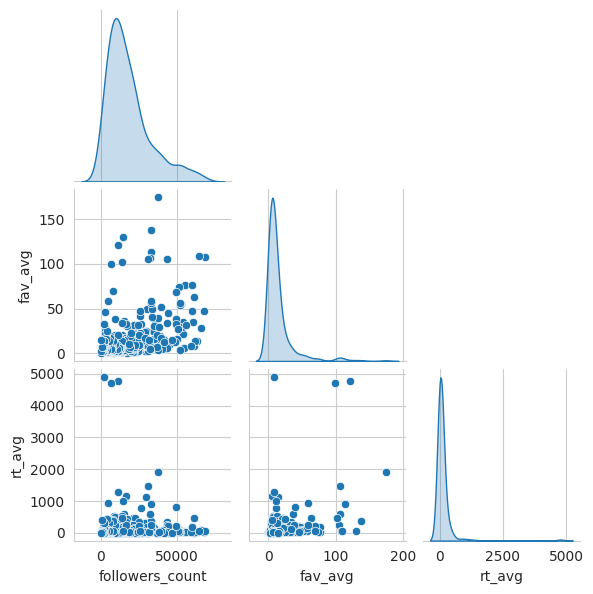

In [82]:
import seaborn as sns

# only take the numerical columns for the pairplot
df_numerical = df_no[['followers_count', 'fav_avg', 'rt_avg']]

sns.set_style('whitegrid')
sns.pairplot(df_numerical, kind='scatter', diag_kind='kde', corner=True, height=2)
plt.show()

# Correlation
- Correlation can be used to measure the linear relationship between two variables x and y. 
- A numerical descriptive measure of the linear association between x and y is provided by <br>
the coefficient of correlation, r.
- A value of r near or equal to 0 implies little or no linear relationship between y and x. 
- In contrast, the closer r comes to 1 or  -1, the stronger the linear relationship between y and x. 
- And if r = 1 or r = -1, all the sample points fall exactly on the least squares line. 
- The correlation coefﬁcient is a pure number, without units. It is not affected by
  - interchanging the two variables,
  - adding the same number to all the values of one variable,
  - multiplying all the values of one variable by the same positive number.

## Correlation with outliers

In [85]:
import numpy as np

df1 = df.dropna()
corr_followers_fav = np.corrcoef(df1.followers_count, df1.fav_avg)[0, 1]
corr_followers_rt = np.corrcoef(df1.followers_count, df1.rt_avg)[0, 1]
corr_fav_rt = np.corrcoef(df1.fav_avg, df1.rt_avg)[0, 1]

print( f'Correlation coeff between follower count and likes is = {round(corr_followers_fav, 3)}' )
print( f'Correlation coeff between follower count and retweets is = {round(corr_followers_rt, 3)}' )
print( f'Correlation coeff between likes and retweets is = {round(corr_fav_rt, 3)}' )

Correlation coeff between follower count and likes is = 0.971
Correlation coeff between follower count and retweets is = 0.852
Correlation coeff between likes and retweets is = 0.832


## Correaltion without outliers

In [13]:
import numpy as np

corr_followers_fav = np.corrcoef(df_no.followers_count, df_no.fav_avg)[0, 1]
corr_followers_rt = np.corrcoef(df_no.followers_count, df_no.rt_avg)[0, 1]
corr_fav_rt = np.corrcoef(df_no.fav_avg, df_no.rt_avg)[0, 1]

print( f'Correlation coeff between follower count and likes is = {round(corr_followers_fav, 3)}' )
print( f'Correlation coeff between follower count and retweets is = {round(corr_followers_rt, 3)}' )
print( f'Correlation coeff between likes and retweets is = {round(corr_fav_rt, 3)}' )

Correlation coeff between follower count and likes is = 0.417
Correlation coeff between follower count and retweets is = -0.013
Correlation coeff between likes and retweets is = 0.404


## SD Line
- the standard deviations $s_x, s_y$ give us a first possibility to construct a line describing the observations
- The lines goes through the point of averages, and climbes at the rate of one (vertical) $s_y$ for each (horizontal) $s_x$.
$\begin{equation}
\frac{s_y}{s_x}
\end{equation}
$


In [8]:
df_no[['followers_count', 'fav_avg']].describe().loc[['mean', 'std']].round()

,followers_count,fav_avg
mean,18251.0,14.0
std,14222.0,21.0


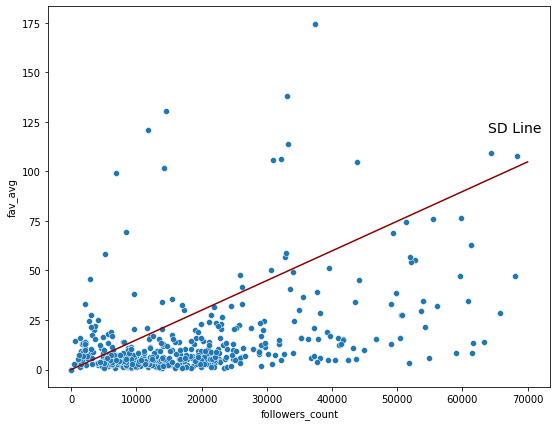

In [13]:
import seaborn as sns
import numpy as np

df_numerical = df_no[['followers_count', 'fav_avg', 'rt_avg']]

s_x, s_y = df_no[['followers_count', 'fav_avg']].describe().loc['std']

x = np.linspace(0, 70000, 70001)
sd_line = x * (s_y / s_x)

fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.scatterplot(x=df_no.followers_count, y=df_no.fav_avg)
ax.annotate(xy=(64000, 120), text='SD Line', fontsize=14)
ax = plt.plot(x, sd_line, color='darkred')
plt.show()

# Regression
- The regression line for y on x estimates the average value for y corresponding to each value of x
-  Along the regression line each increase of $x$ by one $s_x$ is associated with an increase of $y$ by $r*s_y$
- Using the correlation coefficient $r$ to estimate the average value of $y$ for each value of $x$ is called the regression method
- While x grows with $s_x$,  $y$ grows by $r*s_X$
- Why is $r$ the right factor? Consider this: 
  - Suppose $r = 0$ there is no association between x and y an increase in x does not affect y. 
  - If $r=1$ then all point lie on the SD Line. An increase of $x$ in one $s_x$ leads an increase of one $s_y$ in $y$.
  - If $r=-1$ when $x$ goes up one $s_x$ $\rarr$ $y$ goes down by $-s_y$


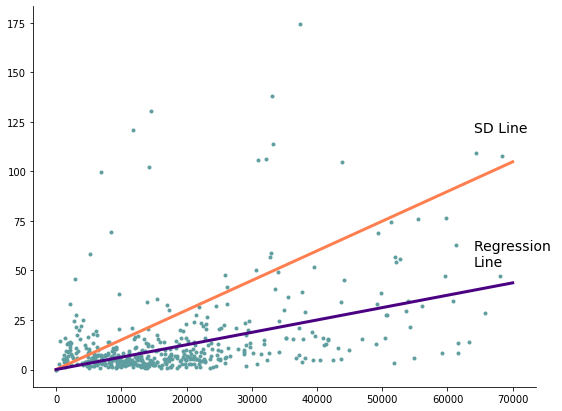

In [14]:
import seaborn as sns
import numpy as np

s_x, s_y = df_no[['followers_count', 'fav_avg']].describe().loc['std']
r_xy = np.corrcoef(df_no.followers_count, df_no.fav_avg)[0, 1]

x = np.linspace(0, 70000, 70001)
sd_line = x * (s_y / s_x)
reg_line = x * (s_y / s_x) * r_xy

fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_no.followers_count, df_no.fav_avg, c='cadetblue', marker='.')
ax.plot(x, sd_line, color='coral', linewidth=3)
ax.plot(x, reg_line, color='indigo', linewidth=3)
ax.spines[['top', 'right']].set_visible(False)
plt.annotate(xy=(64000,120) , text='SD Line', fontsize=14)
plt.annotate(xy=(64000, 52), text='Regression \nLine', fontsize=14)
plt.show()

curve fit:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

linear model:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

real python:
https://realpython.com/linear-regression-in-python/

In [ ]:
- **Linear Regression** is usually used for predictive analysis. <br>
It determines the extent to which there is a linear relationship between $Y$ and $X_i$. <br>
It will give you a trend line (line of best-fit) plotted amongst a set of data points. <br>
- **Logistic regression** is used to calculate (or predict) the **probability [0, 1] <br>
of a binary (yes/no) event occurring**.